### Part 0: Import
Import all the libraries you need for this project

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### Part 1: Getting the Data


In [5]:
tesla = pd.read_csv('G:/Edu/Self-Study/Udemy-Python for Financial Analysis and Algorithmic trading- Jose Portilla/Python-for-Finance-Repo-master/07-Stock-Market-Analysis-Capstone-Project/Tesla_Stock.csv')

In [6]:
tesla.head()

,Date,Open,High,Low,Close,Volume
0,2012-01-03,28.94,29.50,27.65,28.08,928052
1,2012-01-04,28.21,28.67,27.50,27.71,630036
2,2012-01-05,27.76,27.93,26.85,27.12,1005432
3,2012-01-06,27.20,27.79,26.41,26.89,687081
4,2012-01-09,27.00,27.49,26.12,27.25,896951


In [41]:
ford = pd.read_csv('G:/Edu/Self-Study/Udemy-Python for Financial Analysis and Algorithmic trading- Jose Portilla/Python-for-Finance-Repo-master/07-Stock-Market-Analysis-Capstone-Project/Ford_Stock.csv')
gm = pd.read_csv('G:/Edu/Self-Study/Udemy-Python for Financial Analysis and Algorithmic trading- Jose Portilla/Python-for-Finance-Repo-master/07-Stock-Market-Analysis-Capstone-Project/GM_Stock.csv')

In [9]:
ford.head()

,Date,Open,High,Low,Close,Volume
0,2012-01-03,11.00,11.25,10.99,11.13,45709811
1,2012-01-04,11.15,11.53,11.07,11.30,79725188
2,2012-01-05,11.33,11.63,11.24,11.59,67877467
3,2012-01-06,11.74,11.80,11.52,11.71,59840605
4,2012-01-09,11.83,11.95,11.70,11.80,53981467


In [10]:
gm.head()

,Date,Open,High,Low,Close,Volume
0,2012-01-03,20.83,21.18,20.75,21.05,9321420
1,2012-01-04,21.05,21.37,20.75,21.15,7856752
2,2012-01-05,21.10,22.29,20.96,22.17,17884040
3,2012-01-06,22.26,23.03,22.24,22.92,18234608
4,2012-01-09,23.20,23.43,22.70,22.84,12091714


### Part 2: Visualize the Data

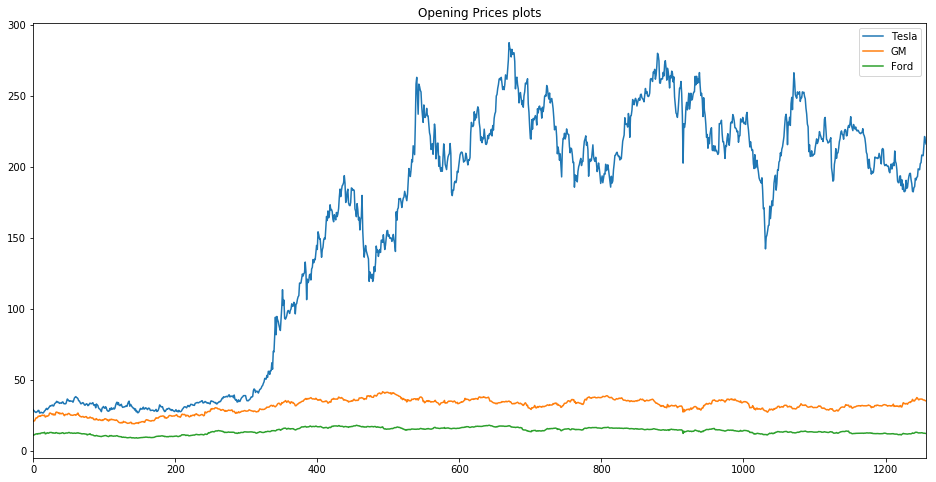

In [12]:
tesla['Open'].plot(label = 'Tesla', figsize =(16,8), title ='Opening Prices plots')
gm['Open'].plot(label = 'GM')
ford['Open'].plot(label = 'Ford')
plt.legend()
#Here, the fidsize and title are specified in the Tesla column but it is used for the plots below that as well.

### Plot the volume of stock traded each day 

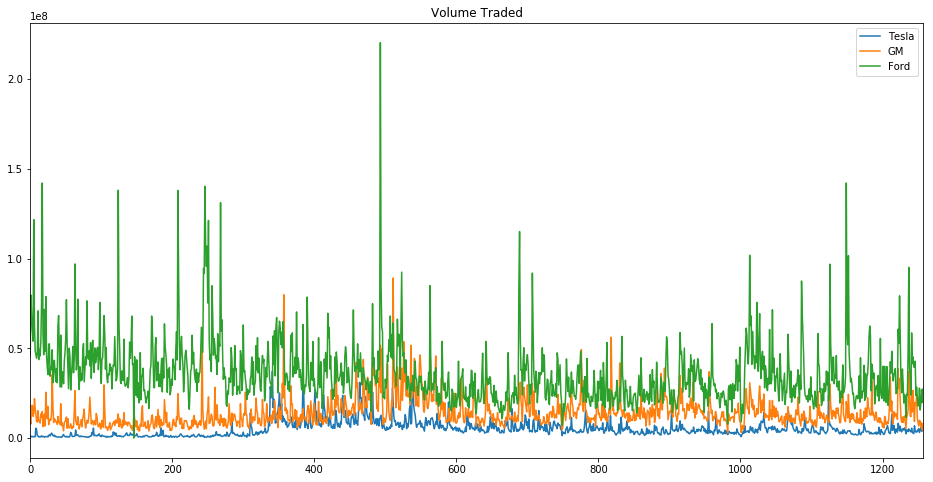

In [13]:
tesla['Volume'].plot(label = 'Tesla', figsize =(16,8), title ='Volume Traded')
gm['Volume'].plot(label = 'GM')
ford['Volume'].plot(label = 'Ford')
plt.legend()

### Interesting, looks like Ford had a really big spike somewhere in late 2013. What was the date of this maximum trading volume for Ford?

### Bonus: What happened that day?

In [42]:
ford = ford.set_index('Date')
gm = gm.set_index('Date')
ford['Volume'].argmax()

'2013-12-18'

### The Open Price Time Series Visualization makes Tesla look like its always been much more valuable as a company than GM and Ford. But to really understand this we would need to look at the total market cap of the company, not just the stock price. Unfortunately our current data doesn't have that information of total units of stock present. But what we can do as a simple calcualtion to try to represent total money traded would be to multply the Volume column by the Open price. Remember that this still isn't the actual Market Cap, its just a visual representation of the total amount of money being traded around using the time series. (e.g. 100 units of stock at $10 each versus 100000 units of stock at $1 each)

### Create a new column for each dataframe called "Total Traded" which is the Open Price multiplied by the Volume Traded.

In [19]:
tesla['Total Traded'] = tesla['Open']*tesla['Volume']
ford['Total Traded'] = ford['Open']*ford['Volume']
gm['Total Traded'] = gm['Open']*gm['Volume']

### Plot this "Total Traded" against the time index.

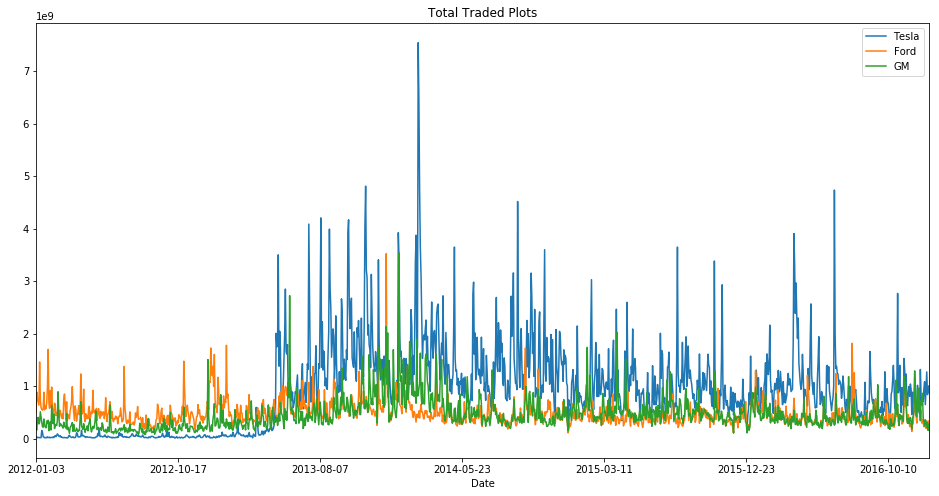

In [21]:
tesla['Total Traded'].plot(label ='Tesla', figsize =(16, 8), title ='Total Traded Plots')
ford['Total Traded'].plot(label ='Ford')
gm['Total Traded'].plot(label ='GM')
plt.legend()

### Interesting, looks like there was huge amount of money traded for Tesla somewhere in early 2014. What date was that and what happened?

In [24]:
#tesla = tesla.set_index('Date')
tesla['Total Traded'].argmax()

'2014-02-25'

### Let's practice plotting out some MA (Moving Averages). Plot out the MA50 and MA200 for GM.

In [25]:
gm['MA50'] = gm['Open'].rolling(50).mean()
gm['MA200'] = gm['Open'].rolling(200).mean()

In [30]:
# Method 1

#gm['Open'].plot(label ='Open' , figsize =(16, 8), title ='Rolling Averages Plot for FORD')
#gm['MA50'].plot(label ='GM50')
#gm['MA200'].plot(label = 'GM200')
#plt.legend()


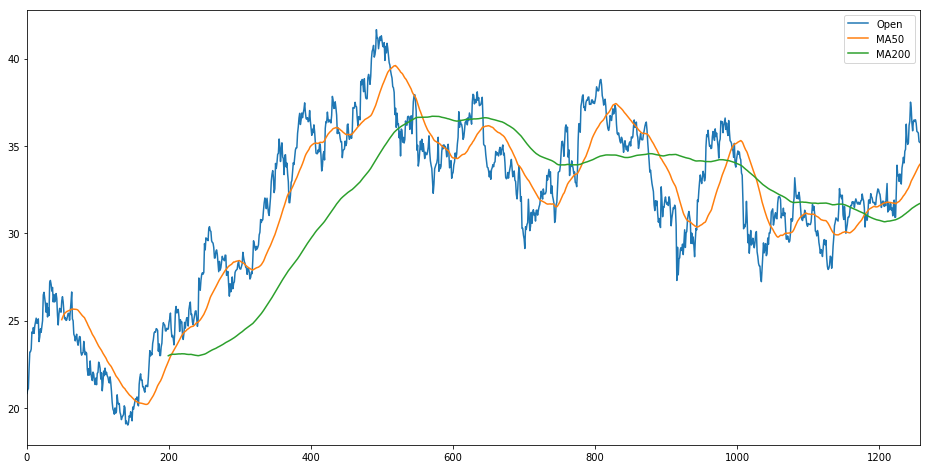

In [32]:
gm[['Open', 'MA50', 'MA200']].plot(figsize=(16,8))

### Finally lets see if there is a relationship between these stocks, after all, they are all related to the car industry. We can see this easily through a scatter matrix plot. Import scatter_matrix from pandas.plotting and use it to create a scatter matrix plot of all the stocks'opening price. You may need to rearrange the columns into a new single dataframe. Hints and info can be found here: https://pandas.pydata.org/pandas-docs/stable/visualization.html#scatter-matrix-plot

In [33]:
from pandas.plotting import scatter_matrix

In [43]:
car_comp = pd.concat([tesla['Open'], gm['Open'], ford['Open']], axis = 1)

In [44]:
car_comp.head()

,Open,Open,Open
Date,,,
2012-01-03,28.94,20.83,11.00
2012-01-04,28.21,21.05,11.15
2012-01-05,27.76,21.10,11.33
2012-01-06,27.20,22.26,11.74
2012-01-09,27.00,23.20,11.83


In [45]:
car_comp.columns = ['Tesla Open', "GM Open", 'Ford Open']

In [46]:
car_comp.head()

,Tesla Open,GM Open,Ford Open
Date,,,
2012-01-03,28.94,20.83,11.00
2012-01-04,28.21,21.05,11.15
2012-01-05,27.76,21.10,11.33
2012-01-06,27.20,22.26,11.74
2012-01-09,27.00,23.20,11.83


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002C1CC636BA8>,
      dtype=object)

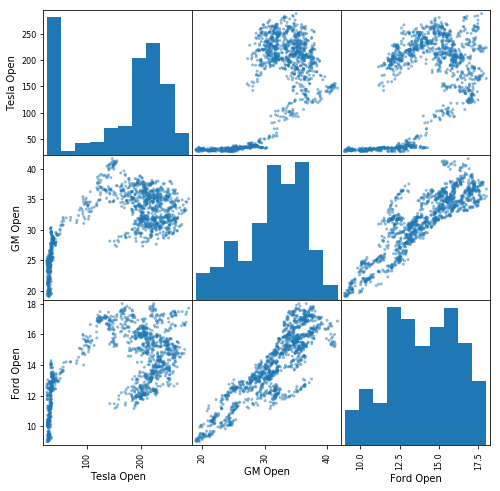

In [47]:
scatter_matrix(car_comp, figsize = (8, 8))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002C1CC59F358>,
      dtype=object)

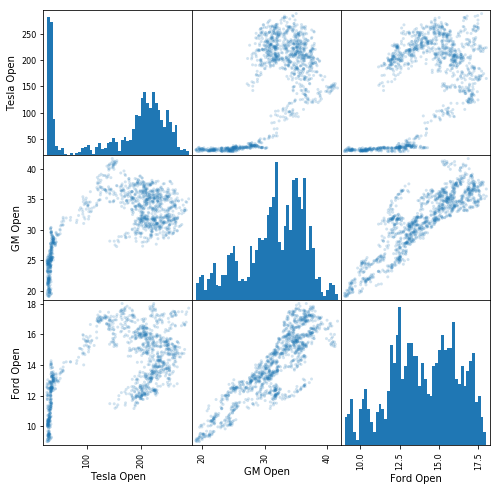

In [48]:
scatter_matrix(car_comp, figsize = (8, 8), alpha = 0.2, hist_kwds = {'bins': 50})

### Bonus Visualization Task! (Note: This is hard!)
### Let's now create a candlestick chart! Watch the video if you get stuck on trying to recreate this visualization, there are quite a few steps involved!Refer to the video to understand how to interpret and read this chart. Hints: https://matplotlib.org/examples/pylab_examples/finance_demo.html

### Create a CandleStick chart for Ford in January 2012 (too many dates won't look good for a candlestick chart)

In [74]:
import matplotlib.dates

In [75]:
from matplotlib.dates import date2num

In [76]:
from matplotlib.finance import candlestick_ohlc
from matplotlib.dates import DateFormatter, WeekdayLocator, DayLocator, MONDAY

In [77]:
ford_reset = ford.loc['2012-01-01': '2012-01-31'].reset_index()

In [78]:
ford_reset.head()

,Date,Open,High,Low,Close,Volume
0,2012-01-03,11.00,11.25,10.99,11.13,45709811
1,2012-01-04,11.15,11.53,11.07,11.30,79725188
2,2012-01-05,11.33,11.63,11.24,11.59,67877467
3,2012-01-06,11.74,11.80,11.52,11.71,59840605
4,2012-01-09,11.83,11.95,11.70,11.80,53981467


In [79]:
ford_reset['date_ax'] = ford_reset['Date'].apply(lambda date: date2num(date)) 
ford_reset.info()

AttributeError: 'numpy.str_' object has no attribute 'toordinal'

### Part 3: Basic Financial Analysis
Now it is time to focus on a few key financial calculations. This will serve as your transition to the second half of the course. All you need to do is follow along with the instructions, this will mainly be an exercise in converting a mathematical equation or concept into code using python and pandas, something we will do often when working with quantiative data! If you feel very lost in this section, don't worry! Just go to the solutions lecture and treat it as a code-along lecture, use whatever style of learning works best for you!

Let's begin!

### Daily Percentage Change
First we will begin by calculating the daily percentage change. Daily percentage change is defined by the following formula:

rt=ptpt−1−1rt=ptpt−1−1
This defines r_t (return at time t) as equal to the price at time t divided by the price at time t-1 (the previous day) minus 1. Basically this just informs you of your percent gain (or loss) if you bought the stock on day and then sold it the next day. While this isn't necessarily helpful for attempting to predict future values of the stock, its very helpful in analyzing the volatility of the stock. If daily returns have a wide distribution, the stock is more volatile from one day to the next. Let's calculate the percent returns and then plot them with a histogram, and decide which stock is the most stable!

#### Create a new column for each dataframe called returns. This column will be calculated from the Close price column. There are two ways to do this, either a simple calculation using the .shift() method that follows the formula above, or you can also use pandas' built in pct_change method.

In [80]:
tesla['Returns'] = (tesla['Close'] / tesla['Close'].shift(1)) - 1

In [81]:
tesla['Returns1'] = tesla['Close'].pct_change(1)

In [82]:
tesla

,Open,High,Low,Close,Volume,Total Traded,Returns,Returns1
Date,,,,,,,,
2012-01-03,28.94,29.50,27.65,28.08,928052,2.685782e+07,NaN,NaN
2012-01-04,28.21,28.67,27.50,27.71,630036,1.777332e+07,-0.013177,-0.013177
2012-01-05,27.76,27.93,26.85,27.12,1005432,2.791079e+07,-0.021292,-0.021292
2012-01-06,27.20,27.79,26.41,26.89,687081,1.868860e+07,-0.008481,-0.008481
2012-01-09,27.00,27.49,26.12,27.25,896951,2.421768e+07,0.013388,0.013388
2012-01-10,27.44,27.76,27.25,27.62,671732,1.843233e+07,0.013578,0.013578
2012-01-11,27.62,28.38,27.30,28.23,672239,1.856724e+07,0.022085,0.022085
2012-01-12,28.48,28.62,27.80,28.25,729300,2.077046e+07,0.000708,0.000708
2012-01-13,28.40,28.50,22.64,22.79,5506439,1.563829e+08,-0.193274,-0.193274


In [83]:
ford['Returns'] = (ford['Close'] / ford['Close'].shift(1)) - 1
ford['Returns1'] = ford['Close'].pct_change(1)
gm['Returns'] = (gm['Close'] / gm['Close'].shift(1)) - 1
gm['Returns1'] = gm['Close'].pct_change(1)

In [84]:
ford.head()

,Open,High,Low,Close,Volume,Returns,Returns1
Date,,,,,,,
2012-01-03,11.00,11.25,10.99,11.13,45709811,NaN,NaN
2012-01-04,11.15,11.53,11.07,11.30,79725188,0.015274,0.015274
2012-01-05,11.33,11.63,11.24,11.59,67877467,0.025664,0.025664
2012-01-06,11.74,11.80,11.52,11.71,59840605,0.010354,0.010354
2012-01-09,11.83,11.95,11.70,11.80,53981467,0.007686,0.007686


In [85]:
gm.tail(10)

,Open,High,Low,Close,Volume,Returns,Returns1
Date,,,,,,,
2016-12-16,36.40,36.41,36.10,36.37,23751554,0.003587,0.003587
2016-12-19,36.49,36.73,36.15,36.40,10960811,0.000825,0.000825
2016-12-20,36.40,36.73,36.23,36.61,8795938,0.005769,0.005769
2016-12-21,36.50,36.69,36.36,36.42,6669726,-0.005190,-0.005190
2016-12-22,36.29,36.40,35.63,35.69,9911676,-0.020044,-0.020044
2016-12-23,35.83,35.87,35.54,35.69,9351152,0.000000,0.000000
2016-12-27,35.80,35.93,35.50,35.54,6008707,-0.004203,-0.004203
2016-12-28,35.74,35.80,35.13,35.15,8451852,-0.010974,-0.010974
2016-12-29,35.25,35.48,35.12,35.14,4416668,-0.000284,-0.000284


### Now plot a histogram of each companies returns. Either do them separately, or stack them on top of each other. Which stock is the most "volatile"? (as judged by the variance in the daily returns we will discuss volatility in a lot more detail in future lectures.)

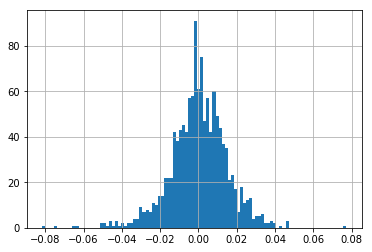

In [89]:
ford['Returns'].hist(bins = 100);

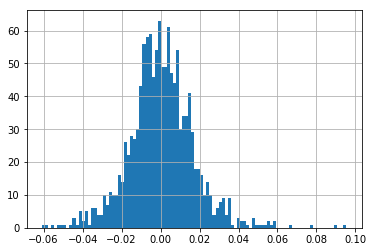

In [90]:
gm['Returns'].hist(bins = 100);

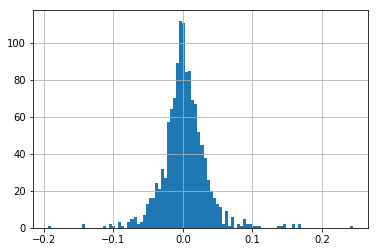

In [91]:
tesla['Returns'].hist(bins = 100);

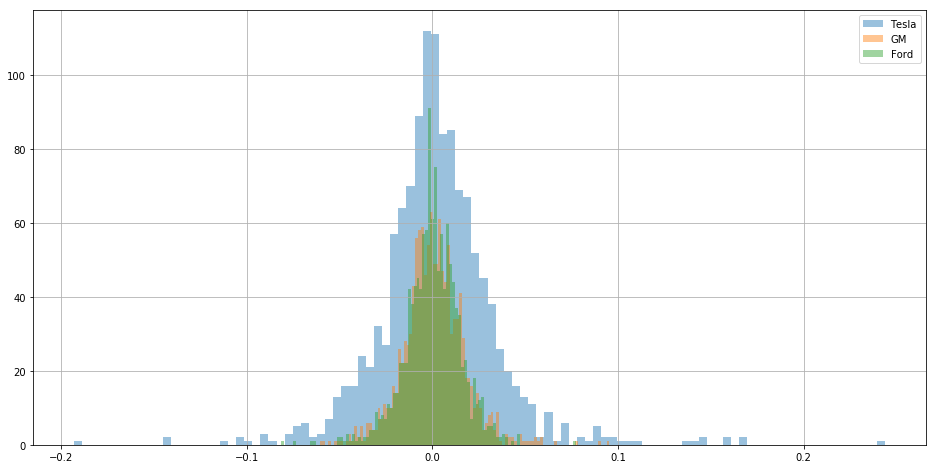

In [96]:
tesla['Returns'].hist(bins = 100, label = 'Tesla', figsize = (16, 8), alpha = 0.45)
gm['Returns'].hist(bins = 100, label = 'GM', figsize = (16, 8), alpha = 0.45)
ford['Returns'].hist(bins = 100, label = 'Ford', figsize = (16, 8), alpha = 0.45)
plt.legend()

#### Try also plotting a KDE instead of histograms for another view point. Which stock has the widest plot?

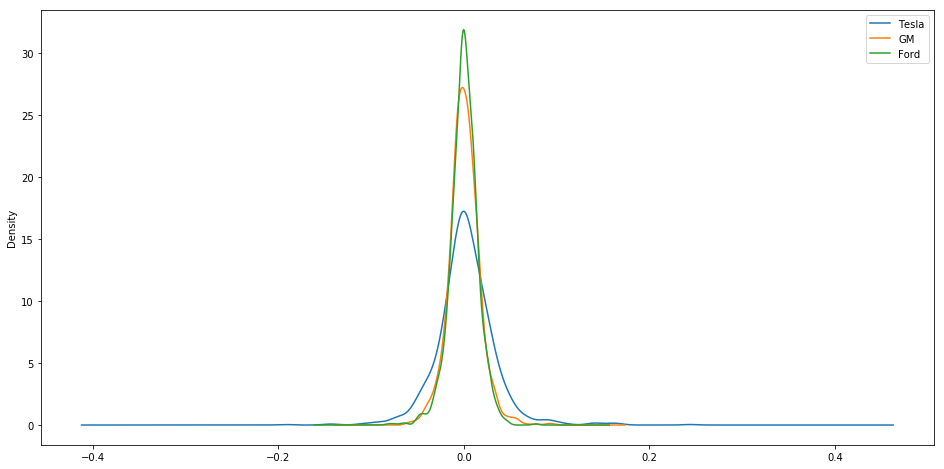

In [99]:
tesla['Returns'].plot(kind = 'kde', label = 'Tesla', figsize = (16, 8))
gm['Returns'].plot(kind = 'kde', label = 'GM', figsize = (16, 8))
ford['Returns'].plot(kind = 'kde', label = 'Ford', figsize = (16, 8))
plt.legend();

### Try also creating some box plots comparing the returns.

In [101]:
# Now while making box-plots, we need all the columns in the same dataframe.
box_df = pd.concat([tesla['Returns'], ford['Returns'], gm['Returns']], axis = 1)
box_df.columns = ['Tesla Returns', 'Ford Returns', 'GM Returns']

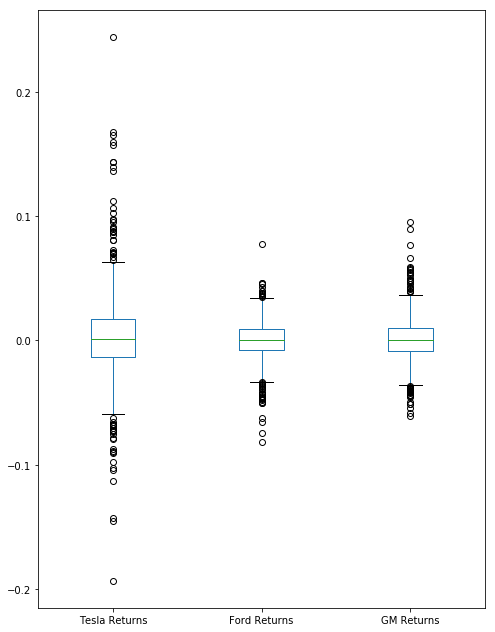

In [103]:
box_df.plot(kind = 'box', figsize = (8, 11))

### Comparing Daily Returns between Stocks
Create a scatter matrix plot to see the correlation between each of the stocks daily returns. This helps answer the questions of how related the car companies are. Is Tesla begin treated more as a technology company rather than a car company by the market?

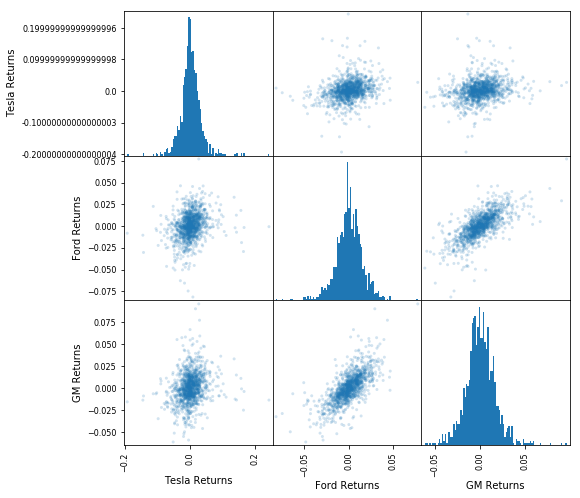

In [104]:
scatter_matrix(box_df, figsize = (8, 8), alpha = 0.2, hist_kwds = {'bins': 100});

### It looks like Ford and GM do have some sort of possible relationship, let's plot just these two against eachother in scatter plot to view this more closely!

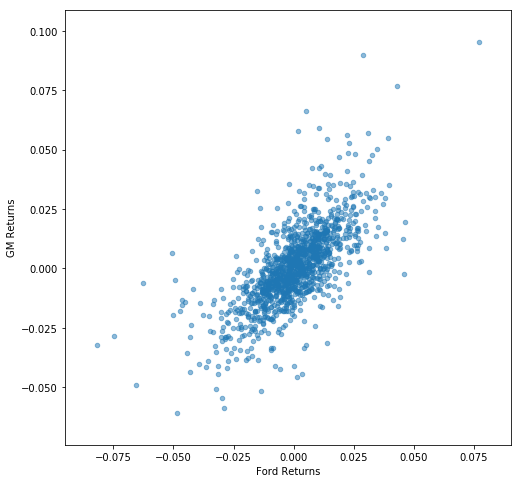

In [107]:
box_df.plot(kind = 'scatter', x = 'Ford Returns', y = 'GM Returns', alpha = 0.5, figsize = (8, 8))

### Cumulative Daily Returns
Great! Now we can see which stock was the most wide ranging in daily returns (you should have realized it was Tesla, our original stock price plot should have also made that obvious).

With daily cumulative returns, the question we are trying to answer is the following, if I invested $1 in the company at the beginning of the time series, how much would it be worth today? This is different than just the stock price at the current day, because it will take into account the daily returns. Keep in mind, our simple calculation here won't take into account stocks that give back a dividend. Let's look at some simple examples:

Lets us say there is a stock 'ABC' that is being actively traded on an exchange. ABC has the following prices corresponding to the dates given

Date                        Price
01/01/2018                   10
01/02/2018                   15
01/03/2018                   20
01/04/2018                   25

### Daily Return : Daily return is the profit/loss made by the stock compared to the previous day. (This is what ew just calculated above). A value above one indicates profit, similarly a value below one indicates loss. It is also expressed in percentage to convey the information better. (When expressed as percentage, if the value is above 0, the stock had give you profit else loss). So for the above example the daily returns would be

Date                         Daily Return                  %Daily Return
01/01/2018                 10/10 =  1                          -   
01/02/2018                 15/10 =  3/2                       50%
01/03/2018                 20/15 =  4/3                       33%
01/04/2018                 25/20 =  5/4                       20%

### Cumulative Return: While daily returns are useful, it doesn't give the investor a immediate insight into the gains he had made till date, especially if the stock is very volatile. Cumulative return is computed relative to the day investment is made. If cumulative return is above one, you are making profits else you are in loss. So for the above example cumulative gains are as follows

Date                       Cumulative Return         %Cumulative Return
01/01/2018                  10/10 =  1                         100 %   
01/02/2018                  15/10 =  3/2                       150 %
01/03/2018                  20/10 =  2                         200 %
01/04/2018                  25/10 =  5/2                       250 %
The formula for a cumulative daily return is:

ii=(1+rt)∗it−1ii=(1+rt)∗it−1
Here we can see we are just multiplying our previous investment at i at t-1 by 1+our percent returns. Pandas makes this very simple to calculate with its cumprod() method. Using something in the following manner:

df[daily_cumulative_return] = ( 1 + df[pct_daily_return] ).cumprod()
Create a cumulative daily return column for each car company's dataframe.

In [108]:
tesla['Cumulative Return'] = (1 + tesla['Returns']).cumprod()

In [109]:
tesla.head(15)

,Open,High,Low,Close,Volume,Total Traded,Returns,Returns1,Cumulative Return
Date,,,,,,,,,
2012-01-03,28.94,29.50,27.65,28.08,928052,2.685782e+07,NaN,NaN,NaN
2012-01-04,28.21,28.67,27.50,27.71,630036,1.777332e+07,-0.013177,-0.013177,0.986823
2012-01-05,27.76,27.93,26.85,27.12,1005432,2.791079e+07,-0.021292,-0.021292,0.965812
2012-01-06,27.20,27.79,26.41,26.89,687081,1.868860e+07,-0.008481,-0.008481,0.957621
2012-01-09,27.00,27.49,26.12,27.25,896951,2.421768e+07,0.013388,0.013388,0.970442
2012-01-10,27.44,27.76,27.25,27.62,671732,1.843233e+07,0.013578,0.013578,0.983618
2012-01-11,27.62,28.38,27.30,28.23,672239,1.856724e+07,0.022085,0.022085,1.005342
2012-01-12,28.48,28.62,27.80,28.25,729300,2.077046e+07,0.000708,0.000708,1.006054
2012-01-13,28.40,28.50,22.64,22.79,5506439,1.563829e+08,-0.193274,-0.193274,0.811610


In [110]:
ford['Cumulative Return'] = (1 + ford['Returns']).cumprod()
gm['Cumulative Return'] = (1 + gm['Returns']).cumprod()

### Now plot the Cumulative Return columns against the time series index. Which stock showed the highest return for a $1 invested? Which showed the lowest?

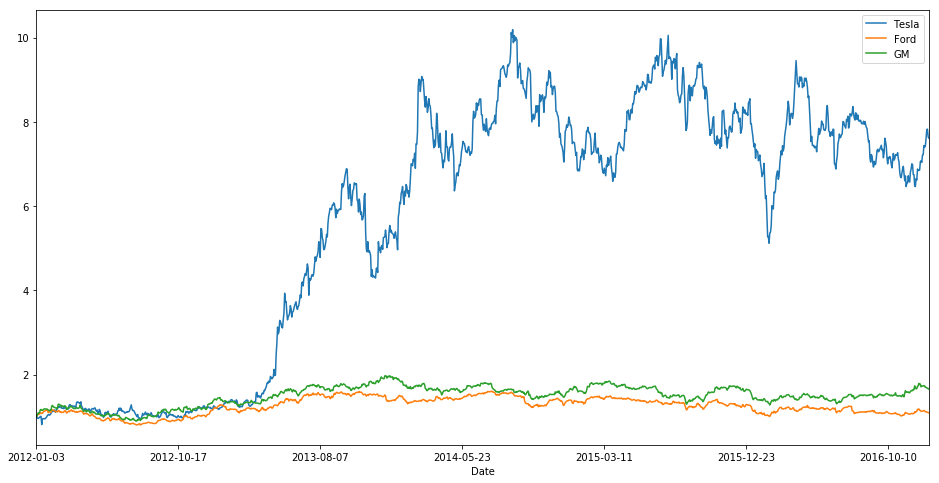

In [112]:
tesla['Cumulative Return'].plot(label = 'Tesla', figsize = (16, 8))
ford['Cumulative Return'].plot(label = 'Ford')
gm['Cumulative Return'].plot(label = 'GM')
plt.legend()